<a href="https://www.kaggle.com/code/tarizatique/notebook37892ded9e?scriptVersionId=105875972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data/crime_data.csv


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.cluster.hierarchy as sch 


In [45]:
crime = pd.read_csv("../input/crime-data/crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.shape

(50, 5)

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**EDA**

In [8]:
crime.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [9]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [46]:
#renaming the column
crime = crime.rename(columns={'Unnamed: 0':'state'})

Data visualisation

<AxesSubplot:xlabel='state'>

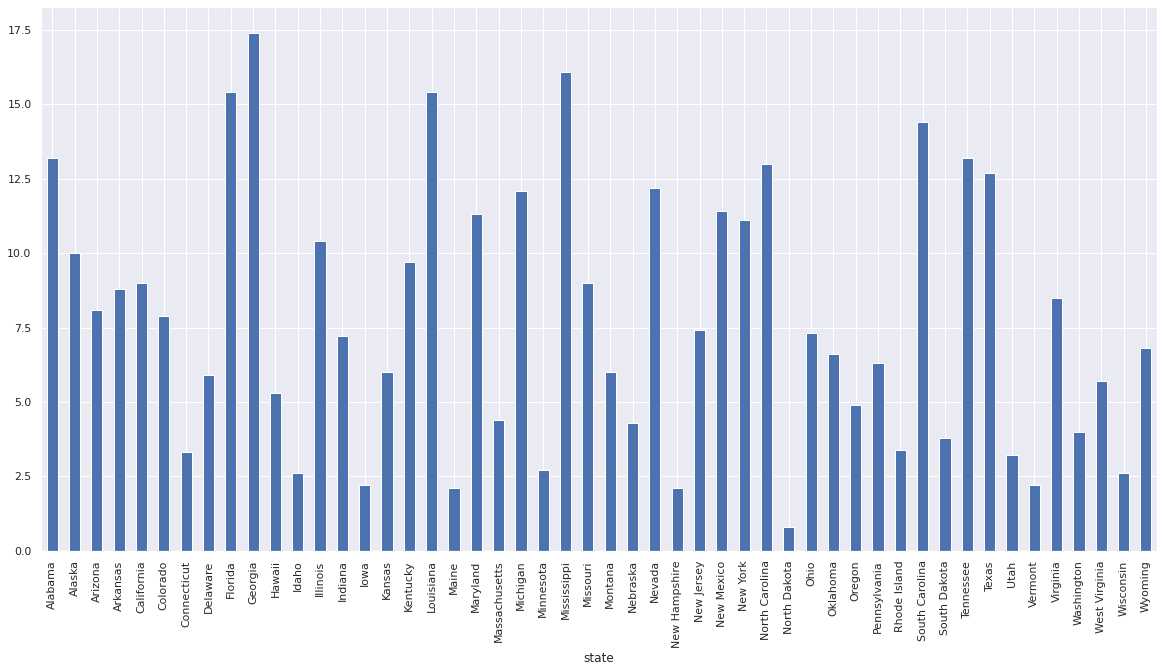

In [15]:
#Murder Rate  by plotting data
plt.figure(figsize=(20,10))
crime.groupby('state')['Murder'].max().plot(kind='bar')

<AxesSubplot:xlabel='state'>

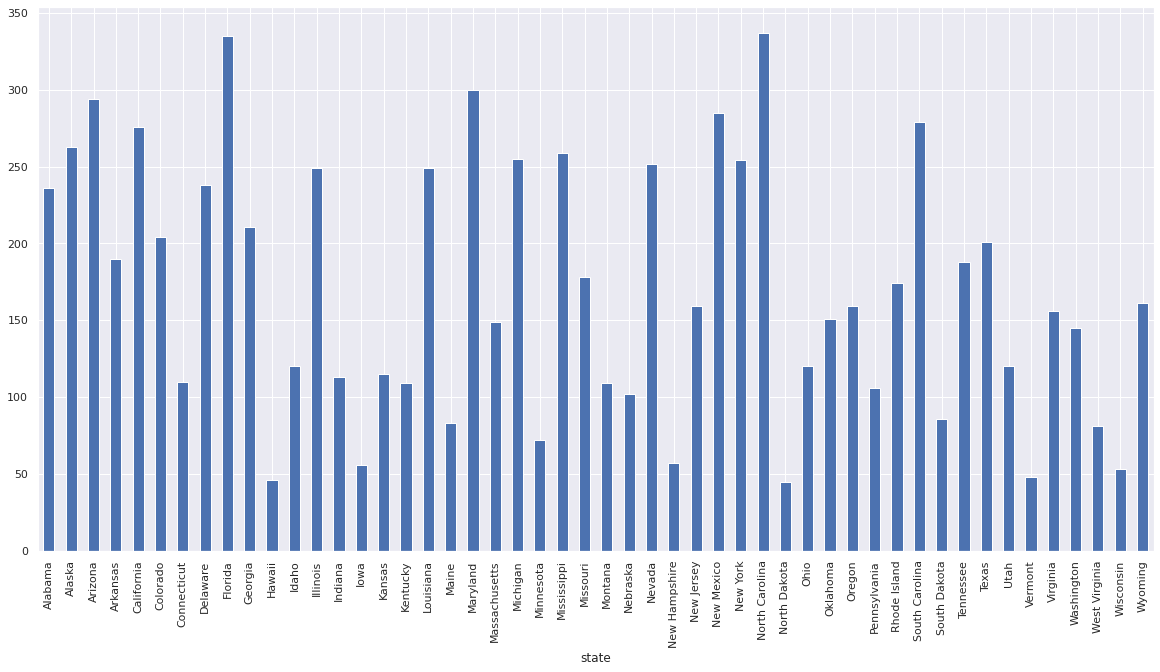

In [16]:
#Assault Rate  by plotting data
plt.figure(figsize=(20,10))
crime.groupby('state')['Assault'].max().plot(kind='bar')

<AxesSubplot:xlabel='state'>

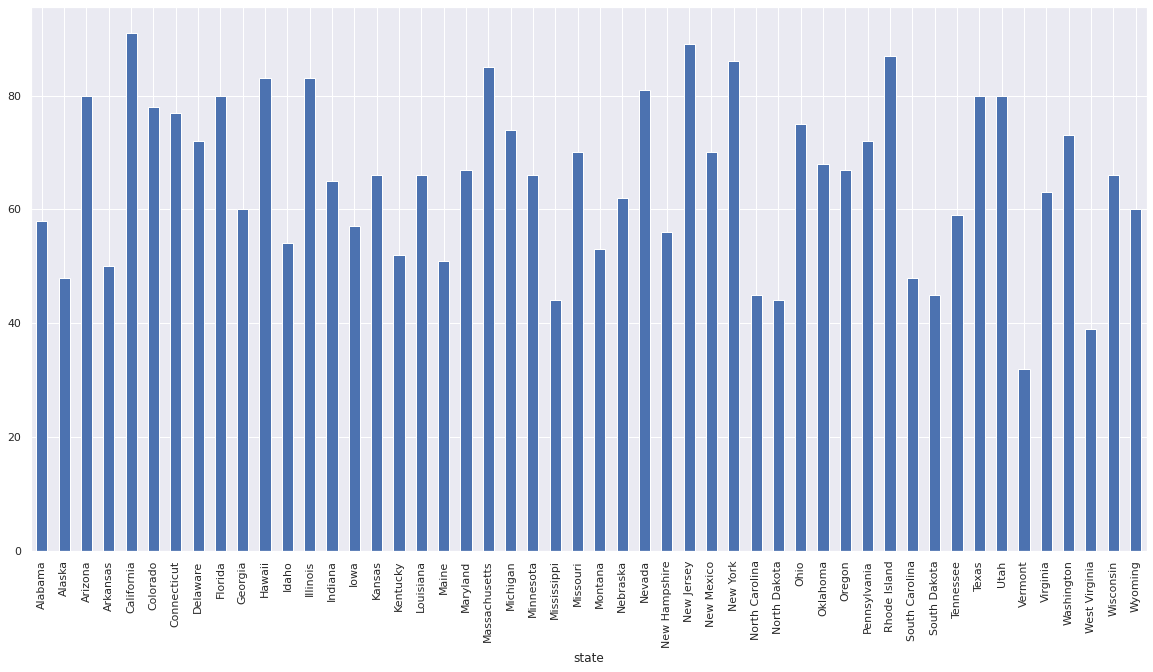

In [17]:
#urbanpop Rate  by plotting data
plt.figure(figsize=(20,10))
crime.groupby('state')['UrbanPop'].max().plot(kind='bar')

<AxesSubplot:xlabel='state'>

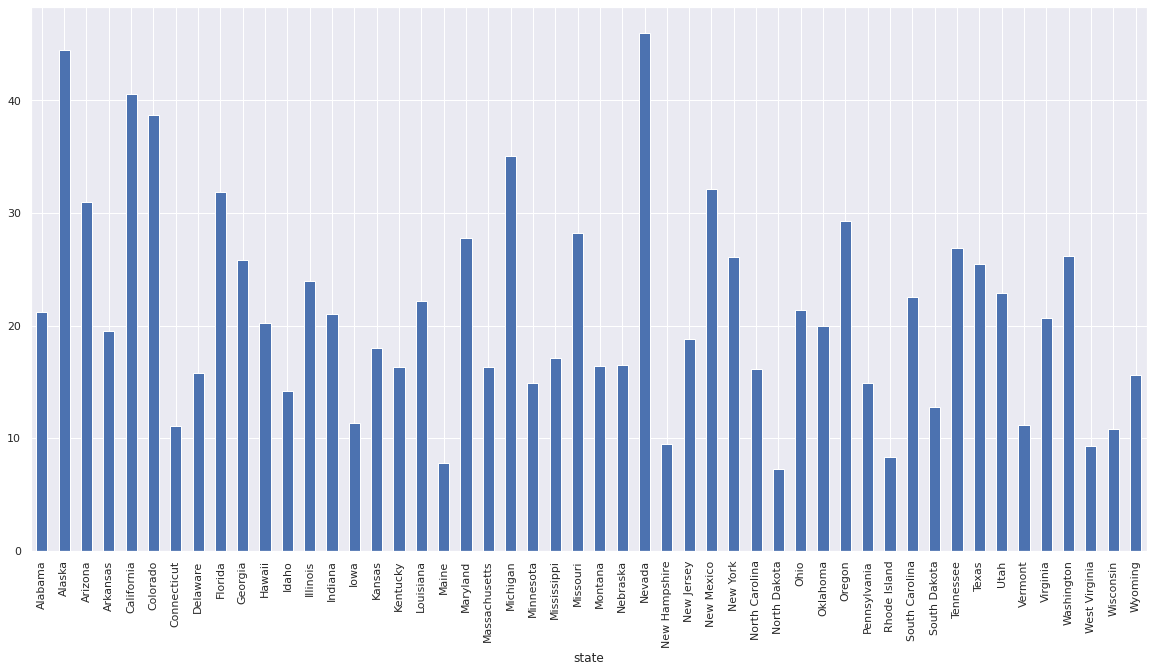

In [18]:
#Rape Rate  by plotting data
plt.figure(figsize=(20,10))
crime.groupby('state')['Rape'].max().plot(kind='bar')

**By looking plot you can tell which states having higher crime rate by the crime category**

Text(0, 0.5, 'Murder Rate')

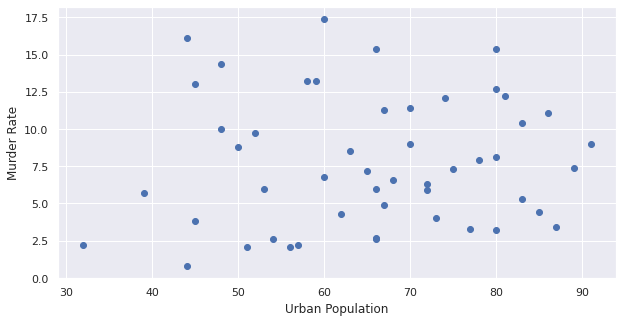

In [19]:
#Scatter plot
#scatter plot  urbanpopulation for murder
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Assault Rate')

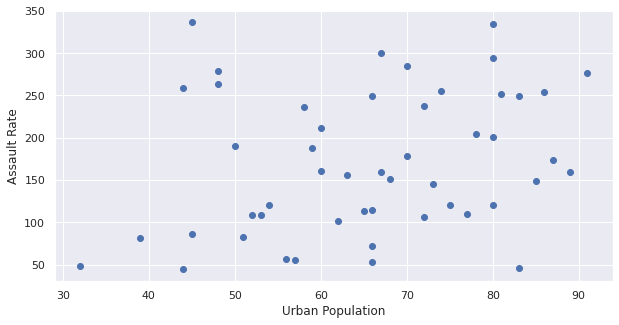

In [20]:
#scatter plot  urbanpopulation for Assault
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

Text(0, 0.5, 'Rape Rate')

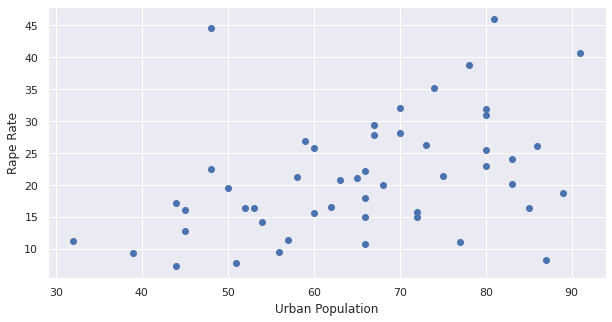

In [21]:
#scatter plot  urbanpopulation for Rape
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

**Data Normalisation**

In [47]:
#using custome function ofr normalisation
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

df_norm = norm_func(crime.iloc[:, 1:])
df_norm.describe()


,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


**Plotting Dendrogram **

Text(0, 0.5, 'Euclidean distance')

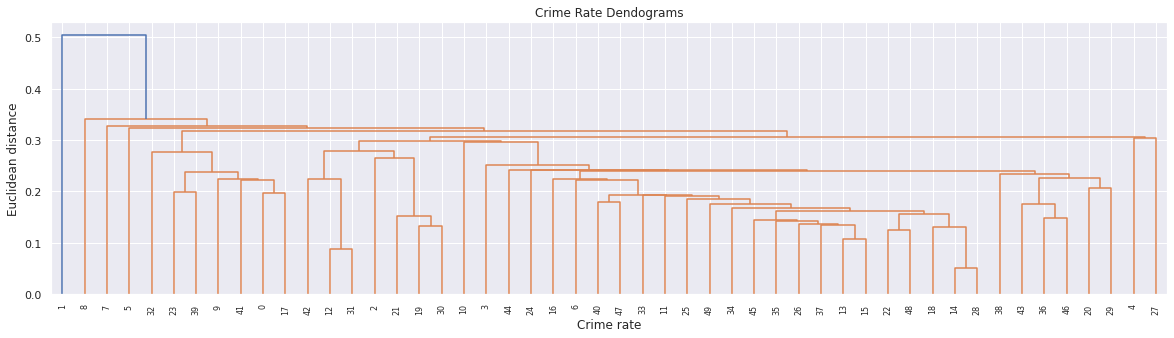

In [25]:
#plotting Dendrogram
#single leakage
plt.figure(figsize=(20,5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

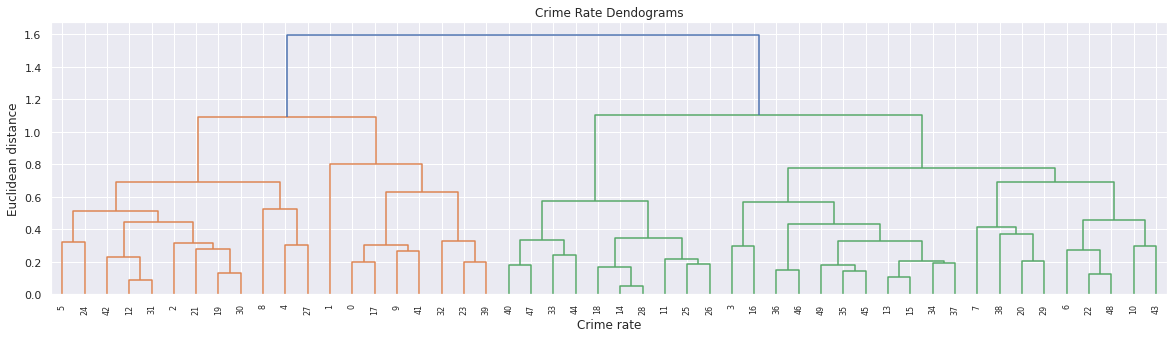

In [26]:
#complete linkage
plt.figure(figsize=(20,5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

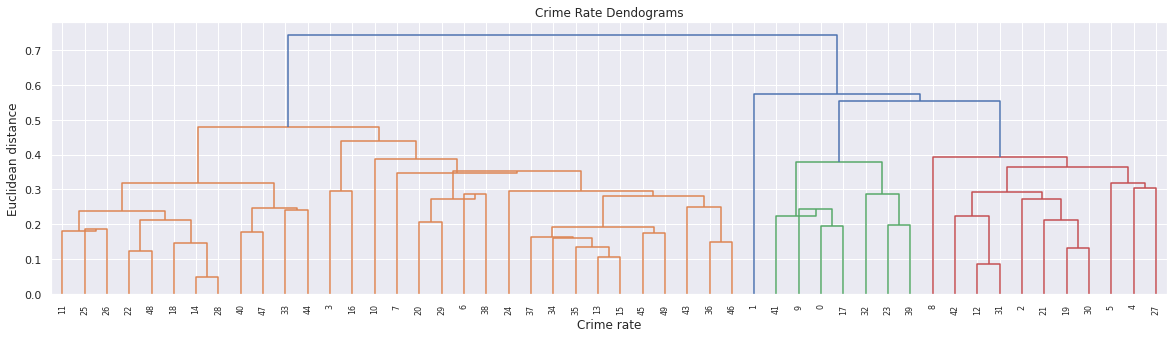

In [27]:
#centroid linkage
plt.figure(figsize=(20,5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(df_norm, method='centroid'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

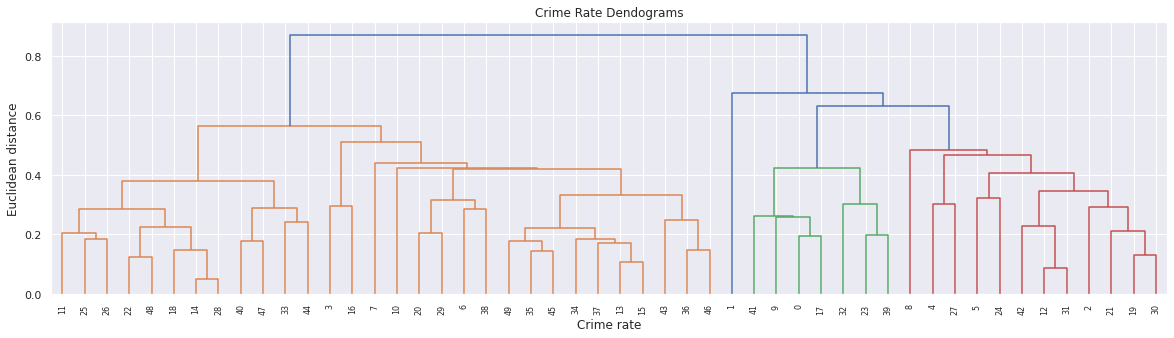

In [28]:
#average linkage
plt.figure(figsize=(20,5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')

From above plots we can choose our number of cluste we can either choose any of the above method , So I am taking the Complete linkage to choose my number of clusters

In [49]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

AC =AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean' , linkage = 'complete')


In [50]:
y_pred = AC.fit_predict(df_norm)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [51]:
#adding our clusters into column name cluster labels
crime['cluster labels'] = y_pred


In [52]:
crime[['state','cluster labels']]

,state,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


Visualisation After performing clustering

<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

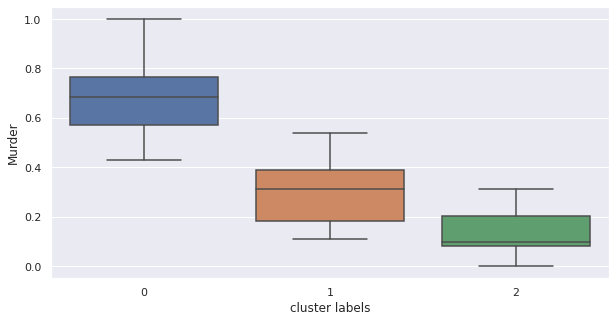

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels',y='Murder',data = df_norm)


<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

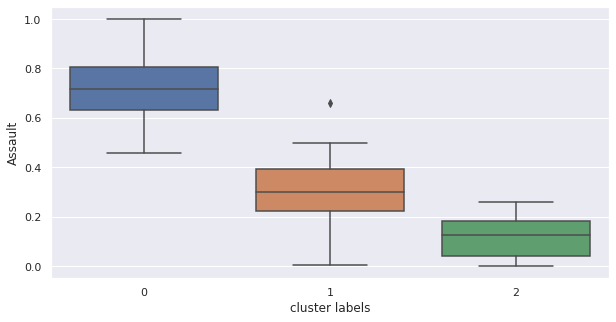

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels',y='Assault',data = df_norm)


<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

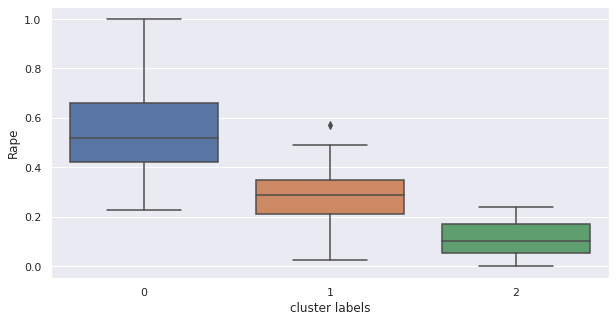

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels',y='Rape',data = df_norm)


In [53]:
#Adding cluster labels names 
#state with having 1 cluster n safe zone 
safe_zone = crime.groupby('cluster labels')['state'].unique()[0]
safe_zone
#state with having 2 cluster in Danger zone 
Danger_zone = crime.groupby('cluster labels')['state'].unique()[1]
Danger_zone
#state having 3 cluster in moderate zone
#it means highest no. of crime rate in this zone
Moderate_zone = crime.groupby('cluster labels')['state'].unique()[2]
Moderate_zone


array(['Idaho', 'Iowa', 'Maine', 'Montana', 'Nebraska', 'New Hampshire',
       'North Dakota', 'South Dakota', 'Vermont', 'West Virginia'],
      dtype=object)

In [54]:
crime

,state,Murder,Assault,UrbanPop,Rape,cluster labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


**K Means Cluster **

In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [56]:
crime_k = pd.read_csv("../input/crime-data/crime_data.csv")

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [57]:
crim = crime_k

In [58]:
df_norm=norm_func(crim.iloc[:,1:])

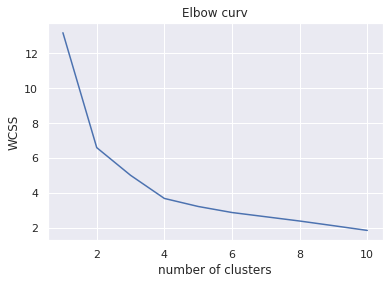

In [59]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [62]:
x=pd.Series(model.labels_)
crime_k['Clust']=x

In [63]:
crime_k

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [66]:
crime_k.iloc[:,1:5].groupby(crime_k.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,5.656250,138.875000,73.875000,18.781250
3,13.937500,243.625000,53.750000,21.412500
